# Quantum Phase Estimation
Example: T-gate
ToDo:


*   Get More Precision

## Introduction
T-gate has the following operation.

$$ 
T|1\rangle = 
\begin{bmatrix}
    1 & 0 \\
    0 & e^{2 \pi i \theta } \\
\end{bmatrix}
\begin{bmatrix}
    0 \\
    1
\end{bmatrix}
= e^{ \frac{i \pi}{4} } |1 \rangle
= e^{2 \pi i \ (\frac{1}{8}) } | 1 \rangle
$$

We will obtain $\theta = \frac{1}{8}$ by applying QPE.

In [2]:
%%capture
!pip install qiskit -q --upgrade
!pip install pylatexenc

In [5]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
import math

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

%config InlineBackend.figure_format = 'svg' # Makes the images look nice

In [28]:
# Initialize circuit
qpe = QuantumCircuit(4, 3)
qpe.x(3)

In [29]:
# Step 1: Apply Hadamard gate to three ancillary qubits[0-2].
for qubit in range(3):
    qpe.h(qubit)

In [30]:
# Step 2: Apply controlled unitary operator C-U.
for qubit in range(3):
    qpe.cp(math.pi/4, qubit, 3)
    for i in range((qubit)*2-1):
        qpe.cp(math.pi/4, qubit, 3)

In [ ]:
# Step 3: Apply inverse QFT.
def qft_dagger(circ, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circ.cu1( -math.pi/float(2**(j-m)), m, j)
        circ.h(j)

qpe.barrier()
qft_dagger(qpe, 3)

In [34]:
# Step 4: Measure ancillary qubits.
qpe.barrier()
for i in range(3):
    qpe.measure(i, i)

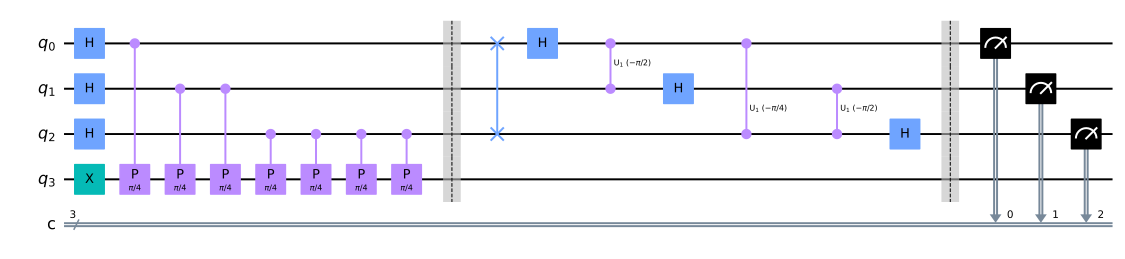

In [35]:
qpe.draw('mpl')

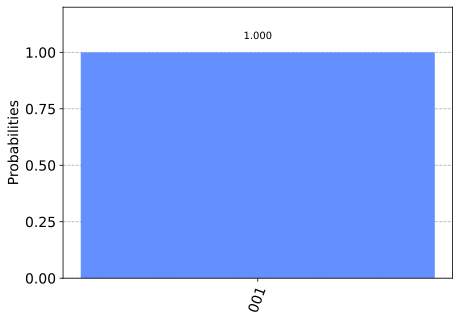

In [36]:
# Running on simulator
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qpe, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

## Get More Precision